In [19]:
import pandas as pd
from pandas import *
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import ta 
from ta.momentum import *
#plt.style.use("fivethirtyeight")

In [2]:
df = web.DataReader("^GDAXI", data_source="yahoo", start="2019-01-01", end="2020-05-17")

In [3]:
close = df.filter(["Close"])
dataset = df.filter(["Close"])
days = df.filter(["Date"])

C:\Users\A675866\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


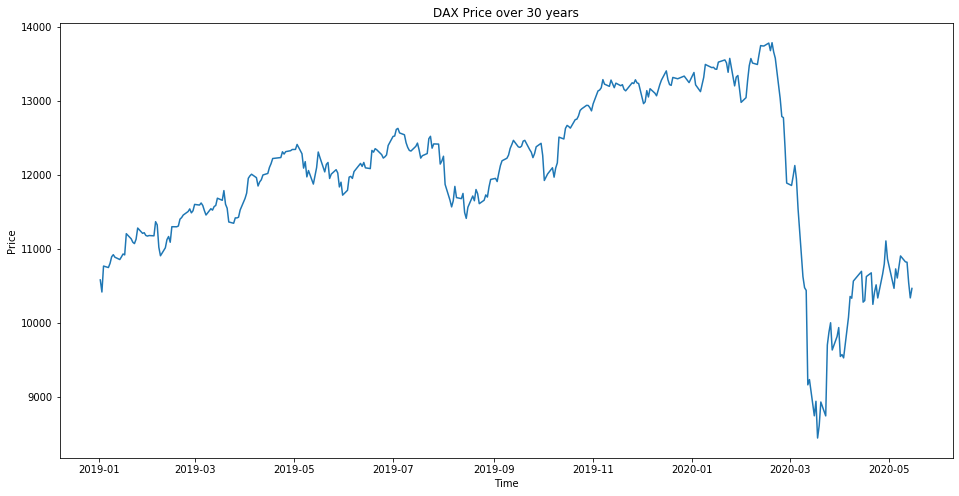

In [4]:
plt.figure(figsize=(16,8))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("DAX Price over 30 years")
plt.plot(close)

In [5]:
dataset['SMA_30'] = close.iloc[:,:].rolling(window=30).mean()
dataset['SMA_100'] = close.iloc[:,].rolling(window=100).mean()
#MACD
exp1 = close.Close.ewm(span=12, adjust=False).mean()
exp2 = close.Close.ewm(span=26, adjust=False).mean()

macd = exp1 - exp2
signal_line = macd.ewm(span=9, adjust=False).mean()
#WilliamsR
#close[-5:]
dataset["macd"] = macd
dataset["macd_signal"] =signal_line
#x = close
#x["Test"] = ta.momentum.RSIIndicator(close.Close, 10, True)
#x
dataset

,Close,SMA_30,SMA_100,macd,macd_signal
Date,,,,,
2019-01-02,10580.190430,NaN,NaN,0.000000,0.000000
2019-01-03,10416.660156,NaN,NaN,-13.045150,-2.609030
2019-01-04,10767.690430,NaN,NaN,4.885369,-1.110150
2019-01-07,10747.809570,NaN,NaN,17.291884,2.570257
2019-01-08,10803.980469,NaN,NaN,31.295900,8.315385
...,...,...,...,...,...
2020-05-11,10824.990234,10372.220964,11861.374873,118.316078,80.543327
2020-05-12,10819.500000,10399.505632,11837.353477,119.562276,88.347116
2020-05-13,10542.660156,10429.843652,11809.952881,97.092020,90.096097


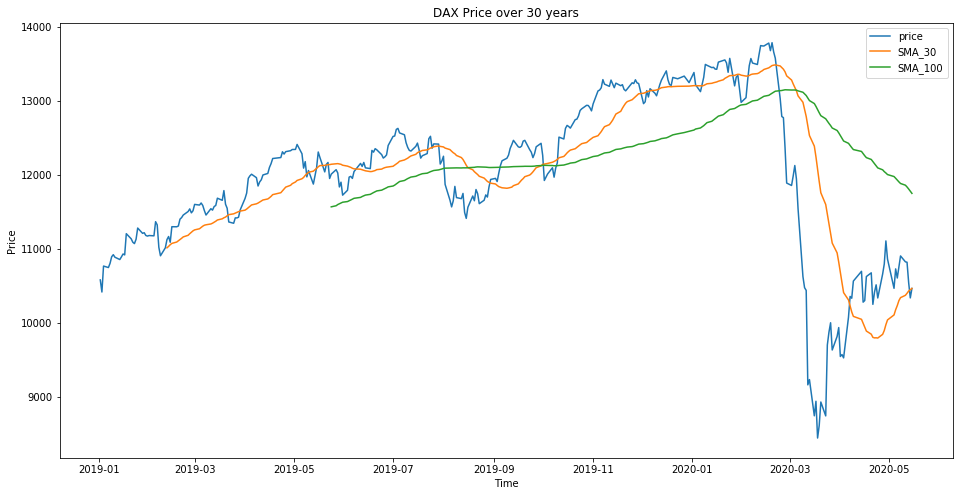

In [6]:
plt.figure(figsize=(16,8))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("DAX Price over 30 years")
#plt.plot(dataset)
plt.plot(close, label="price")
plt.plot(dataset["SMA_30"], label="SMA_30")
plt.plot(dataset["SMA_100"], label="SMA_100")
#plt.plot(dataset["macd"], label='MACD')
#plt.plot(dataset["macd_signal"], label='Signal Line')
plt.legend()

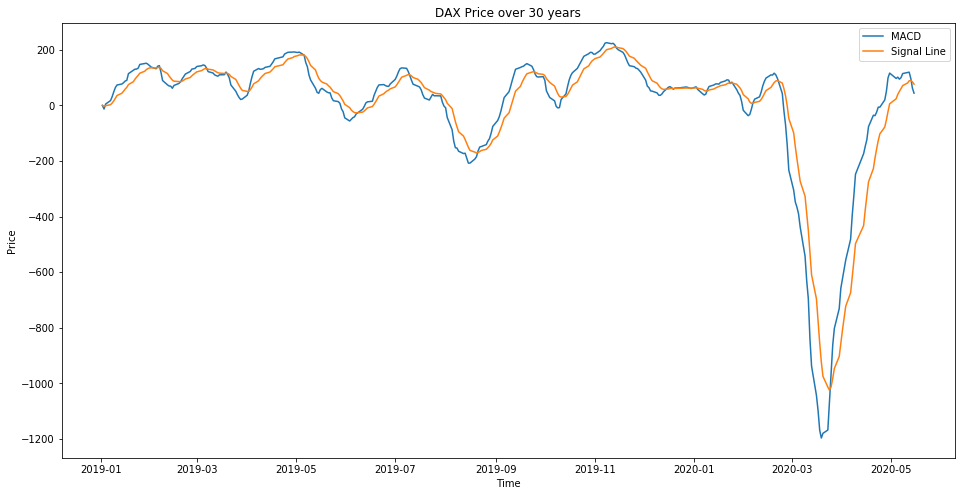

In [7]:
plt.figure(figsize=(16,8))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("DAX Price over 30 years")
#plt.plot(dataset)
#plt.plot(close, label="price")
plt.plot(dataset["macd"], label='MACD')
plt.plot(dataset["macd_signal"], label='Signal Line')
plt.legend()

In [8]:
def buy_sell(data):
    flag = -1
    sigPriceBuy = []
    sigPriceSell = []    
    for record in range(len(data)):
        if data["SMA_30"][record] > data["SMA_100"][record]:
            if flag != 0:
                sigPriceBuy.append(data["Close"][record])
                sigPriceSell.append(np.nan)
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data["SMA_30"][record] < data["SMA_100"][record]:   
            if flag != 1:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data["Close"][record])
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return(sigPriceBuy,sigPriceSell)

In [9]:
buy_sell = buy_sell(dataset)
dataset["Buy"]= buy_sell[0]
dataset["Sell"] = buy_sell[1]

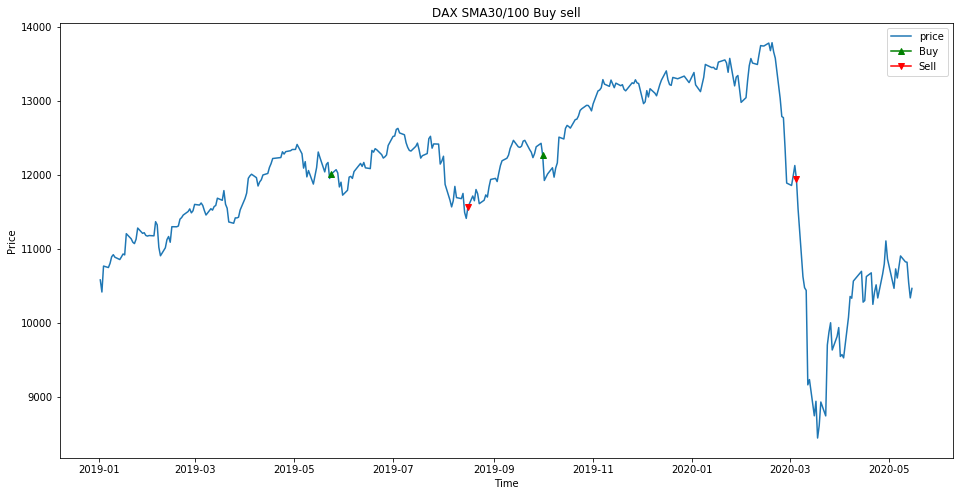

In [10]:
plt.figure(figsize=(16,8))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("DAX SMA30/100 Buy sell")
plt.plot(close, label="price")
plt.plot(dataset.index, dataset["Buy"], label="Buy", marker="^", color="green")
plt.plot(dataset.index, dataset["Sell"], label="Sell", marker="v", color="red")
plt.legend()

In [11]:
def buy_sell_macd(data):
    flag = -1
    sigPriceBuy = []
    sigPriceSell = []    
    for record in range(len(data)):
        if data["macd"][record] > data["macd_signal"][record]:
            if flag != 0:
                sigPriceBuy.append(data["Close"][record])
                sigPriceSell.append(np.nan)
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data["macd"][record] < data["macd_signal"][record]:   
            if flag != 1:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data["Close"][record])
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return(sigPriceBuy,sigPriceSell)

In [12]:
buy_sell_macd = buy_sell_macd(dataset)
dataset["macd_buy"]=buy_sell_macd[0]
dataset["macd_sell"]=buy_sell_macd[1]

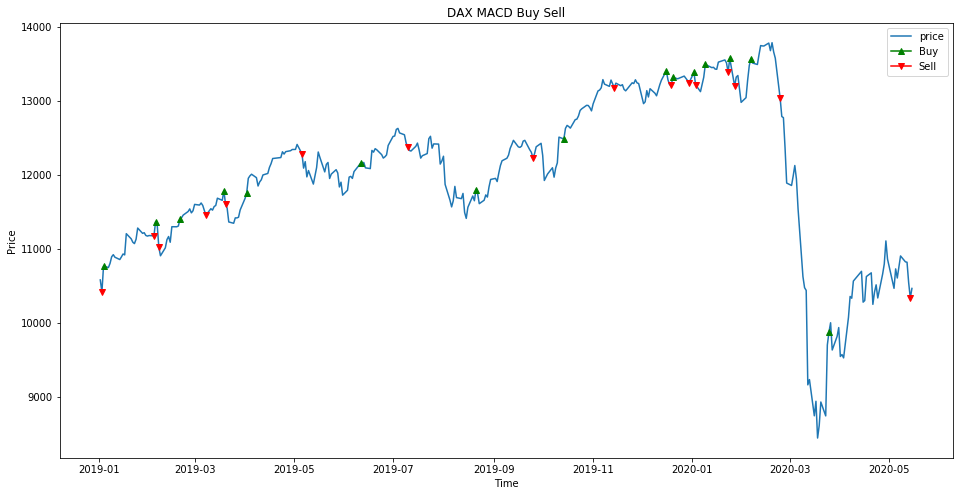

In [13]:
plt.figure(figsize=(16,8))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("DAX MACD Buy Sell")
plt.plot(close, label="price")
plt.plot(dataset.index, dataset["macd_buy"], label="Buy", marker="^", color="green")
plt.plot(dataset.index, dataset["macd_sell"], label="Sell", marker="v", color="red")
plt.legend()

In [14]:
RSI = RSIIndicator(dataset["Close"], 14, False)
#dataset["RSI"] = RSI(dataset["Close"], 14)

In [15]:
dataset["RSI"] = RSI.rsi()

In [16]:
dataset["RSI"]

Date
2019-01-02          NaN
2019-01-03          NaN
2019-01-04          NaN
2019-01-07          NaN
2019-01-08          NaN
                ...    
2020-05-11    54.415227
2020-05-12    54.309249
2020-05-13    49.114896
2020-05-14    45.624156
2020-05-15    48.099696
Name: RSI, Length: 345, dtype: float64

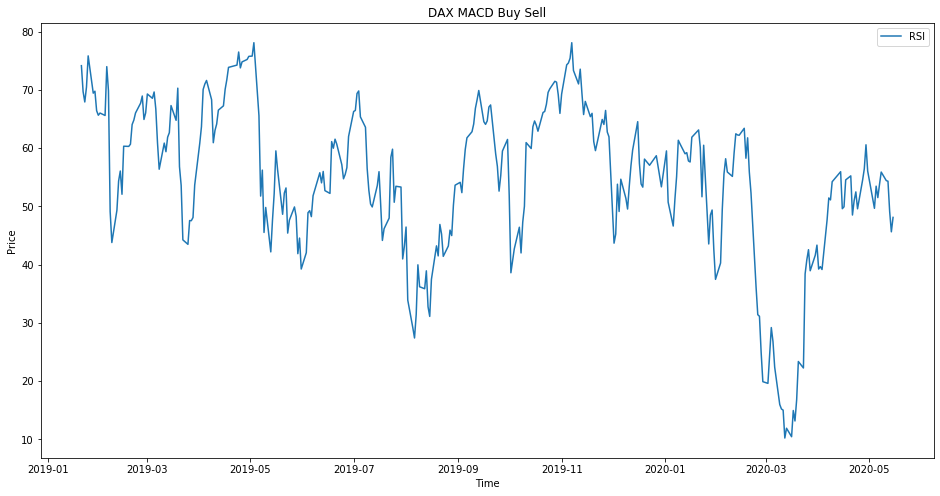

In [18]:
plt.figure(figsize=(16,8))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("DAX MACD Buy Sell")
#plt.plot(close, label="price")
plt.plot(dataset["RSI"], label="RSI")
plt.legend()

In [20]:
WR = WilliamsRIndicator(df["High"], df["Low"], df["Close"])

In [21]:
dataset["WR"] = WR.wr()

,Close,SMA_30,SMA_100,macd,macd_signal,Buy,Sell,macd_buy,macd_sell,RSI,WR
Date,,,,,,,,,,,
2019-01-02,10580.190430,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,10416.660156,NaN,NaN,-13.045150,-2.609030,NaN,NaN,NaN,10416.660156,NaN,NaN
2019-01-04,10767.690430,NaN,NaN,4.885369,-1.110150,NaN,NaN,10767.69043,NaN,NaN,NaN
2019-01-07,10747.809570,NaN,NaN,17.291884,2.570257,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,10803.980469,NaN,NaN,31.295900,8.315385,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-11,10824.990234,10372.220964,11861.374873,118.316078,80.543327,NaN,NaN,NaN,NaN,54.415227,-41.652780
2020-05-12,10819.500000,10399.505632,11837.353477,119.562276,88.347116,NaN,NaN,NaN,NaN,54.309249,-44.439577
2020-05-13,10542.660156,10429.843652,11809.952881,97.092020,90.096097,NaN,NaN,NaN,NaN,49.114896,-74.008246


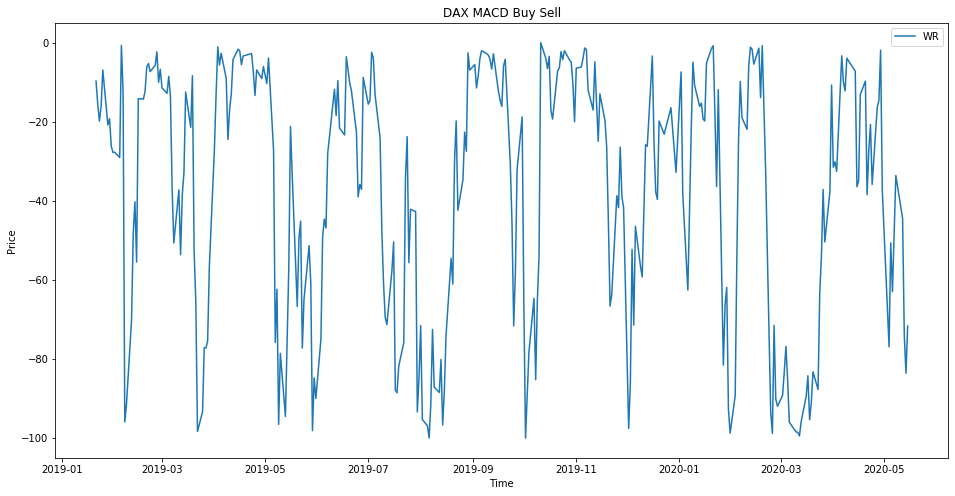

In [23]:
plt.figure(figsize=(16,8))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("DAX MACD Buy Sell")
#plt.plot(close, label="price")
plt.plot(dataset["WR"], label="WR")
plt.legend()